## 1. Frequent Pattern Mining

Frequent pattern mining is a data mining technique used to discover patterns, associations, or correlations among items in large datasets.      
A very common use case is **market basket analysis**, where each transaction is a “basket” of items (e.g., products bought together in a grocery store).      

**Goal:**       
Find itemsets (combinations of items) that occur **frequently** together in the transactions, and then derive **association rules** such as:          

> If a customer buys `X`, they are likely to also buy `Y`.       

These patterns can be used for:      
- Product placement and store layout
- Cross-selling and recommendation systems
- Understanding customer behavior
- Designing promotions and bundles

Two classic algorithms for frequent pattern mining are **Apriori** and **FP-Growth**.

---

## 2. Apriori Algorithm

Apriori is one of the earliest and most well-known algorithms for mining frequent itemsets.        

### 2.1. Basic Idea

Apriori works in a **bottom-up** (level-wise) manner:       

1. Find all **frequent 1-itemsets** (single items whose frequency ≥ minimum support).
2. Use these to generate **candidate 2-itemsets**, then count their frequency and keep only those that are frequent.
3. Use frequent 2-itemsets to generate candidate 3-itemsets, and so on.
4. Stop when no more frequent itemsets can be found.

It uses the **Apriori principle**:       

> If an itemset is frequent, then **all of its subsets must also be frequent**.       
> Conversely, if an itemset is infrequent, **all supersets of that itemset are also infrequent**.       

This principle allows Apriori to **prune** the search space:      
- Any candidate itemset that has an infrequent subset can be safely discarded without counting.

### 2.2. Characteristics

- **Pros:**
  - Conceptually simple and easy to understand.
  - Good for teaching and small/medium datasets.
- **Cons:**
  - Generates many candidate itemsets.
  - Requires multiple passes over the dataset (one pass per itemset length).
  - Can be slow and memory-intensive on larger datasets.

---

## 3. FP-Growth Algorithm

FP-Growth (Frequent Pattern Growth) is a more efficient alternative to Apriori for mining frequent itemsets.

### 3.1. Basic Idea

Instead of generating candidate itemsets explicitly, FP-Growth compresses the dataset into a special data structure called an **FP-tree (Frequent Pattern tree)** and mines it directly.         

Steps:

1. **Scan the dataset once** to compute the frequency of each item and remove infrequent items.
2. **Sort items** in each transaction by descending frequency and build the FP-tree:
   - Each path in the tree represents a set of items appearing together in transactions.
   - Nodes store item names and counts.
3. **Mine the FP-tree recursively** to find frequent itemsets:
   - For each item, construct its **conditional pattern base** and build a **conditional FP-tree**.
   - From these conditional trees, extract frequent itemsets without generating huge numbers of candidates.

### 3.2. Characteristics

- **Pros:**
  - Avoids generating all candidate itemsets explicitly.
  - Usually much faster than Apriori on larger or denser datasets.
  - More efficient in memory usage for many practical problems.
- **Cons:**
  - More complex to implement and understand compared to Apriori.
  - FP-tree may still become large if the dataset is very dense.

## 4. Why Use Frequent Pattern Mining (Apriori & FP-Growth)?

We use these algorithms to uncover **hidden relationships** in transactional data:

- **Market Basket Analysis:**  
  Identify products often bought together (e.g., “bread & butter”, “pasta & tomato sauce”).

- **Recommender Systems:**  
  Suggest items to users based on frequent co-occurrence (e.g., “Customers who bought X also bought Y”).

- **Inventory Management & Promotions:**
  - Plan stock levels based on common combinations.        
  - Design promotions that bundle frequently co-purchased items.

- **Customer Behavior Analysis:**
  Understand how customers combine products and how product categories interact.

**Apriori** is useful as a baseline and for educational purposes, while **FP-Growth** is often preferred in practice for larger datasets because of its performance advantages.

----

## 5. Association Rules

After we find frequent itemsets, we can generate **association rules** of the form:        

$$
\text{Antecedent} \Rightarrow \text{Consequent}
$$
 
Example:        
> (bread, butter) ⇒ (jam)

This means: when customers buy bread and butter together, they often also buy jam.       

To evaluate how strong and interesting these rules are, we use measures such as **support**, **confidence**, and **lift**.

---

## 6. Support, Confidence and Lift

### 6.1. Support

**Support** measures how frequently an itemset appears in the dataset.

For an itemset `X`:

> **support(X) = (number of transactions that contain X) / (total number of transactions)**

For a rule `X ⇒ Y`:

> **support(X ⇒ Y) = support(X ∪ Y)**  
> (the support of the union of `X` and `Y`)

**Interpretation:**
- Support tells us how **common** the combination `X` and `Y` is in the whole dataset.
- A minimum support threshold helps remove very rare itemsets and rules.



### 6.2. Confidence

**Confidence** measures how often the rule is true, given that the antecedent occurs.

For a rule `X ⇒ Y`:

> **confidence(X ⇒ Y) = support(X ∪ Y) / support(X)**

**Interpretation:**
- Confidence estimates the conditional probability **P(Y | X)**.
- In words: “Among all transactions that contain `X`, what fraction also contain `Y`?”

Example:  
If `confidence(X ⇒ Y) = 0.7`, then in 70% of the transactions where `X` appears, `Y` also appears.



### 6.3. Lift

**Lift** compares the observed co‑occurrence of `X` and `Y` with what we would expect if they were **independent**.

For a rule `X ⇒ Y`:

> **lift(X ⇒ Y) = confidence(X ⇒ Y) / support(Y)**  
> or equivalently  
> **lift(X ⇒ Y) = support(X ∪ Y) / (support(X) * support(Y))**

**Interpretation:**

- **lift = 1**  
  `X` and `Y` occur together exactly as often as expected if they were independent (no association).

- **lift > 1**  
  Positive association: `X` and `Y` appear together **more often** than expected by chance.  
  Example: `lift = 1.4` → they co‑occur **40% more often** than expected under independence.

- **lift < 1**  
  Negative association: `X` and `Y` appear together **less often** than expected by chance.

Lift is useful because it adjusts for how common `Y` is overall. A rule with high confidence but lift close to 1 is usually less interesting than a rule with both high confidence and lift > 1.

---

## 7. Summary

- **Frequent pattern mining** finds itemsets that appear often in transaction data.
- **Apriori**:
  - Level-wise, candidate-generation algorithm.
  - Uses the Apriori principle to prune infrequent candidates.<br><br>
- **FP-Growth**:
  - Builds an FP-tree to compress data.
  - Mines frequent patterns without generating all candidates explicitly.
  - Usually faster and more scalable than Apriori.<br><br>       

- **Support**: how frequent the itemset/rule is in the dataset.  
- **Confidence**: how often the rule is correct when the antecedent occurs $(( P(Y \mid X) ))$.  
- **Lift**: how much more (or less) \( X \) and \( Y \) occur together than expected by chance (adjusts for item popularity).

These concepts together allow us to discover **meaningful and actionable patterns** in transactional data.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from IPython.display import Markdown, display
import tracemalloc

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Preprocessing

In [3]:
df = pd.read_csv('../input/groceries-dataset/Groceries_dataset.csv')

df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
df.shape

(38765, 3)

In [6]:
df['Member_number'].unique().shape

(3898,)

In [7]:
df['itemDescription'].describe()

count          38765
unique           167
top       whole milk
freq            2502
Name: itemDescription, dtype: object

In [8]:
df['itemDescription'].value_counts()

itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

In [9]:
df['itemDescription'].value_counts().describe()

count     167.000000
mean      232.125749
std       363.442098
min         1.000000
25%        30.500000
50%        85.000000
75%       264.000000
max      2502.000000
Name: count, dtype: float64

---

**Explanation:**       
link of dataset: https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset/data        
this csv dataset has 3 columns:        
**1. Member_number:** ID of customers       
**2. Date:** Date of purchases       
**3. itemDescription:** Description of product purchased             


      
     
**what we can understand from these data:**      
- this dataset has 38765 rows.                
- we have 3898 unique members, so we have 3898 transactions.      
- we have 167 unique items in dataset.      
- most frequent purchased item is 'whole milk' with freq of 2502.      
- average freq of purchased items is 232.          
- median freq of purchased items is 85. 
- we will groupby 'Member_number' to see purchased basket of each customer.          
- 'Date' column is useless for our task, so we will drop it.
- this dataset has no missing values. 

In [10]:
df.drop('Date', axis=1, inplace=True)
df.head()

,Member_number,itemDescription
0,1808,tropical fruit
1,2552,whole milk
2,2300,pip fruit
3,1187,other vegetables
4,3037,whole milk


In [11]:
df = df.groupby('Member_number')['itemDescription'].apply(list).reset_index(name='Basket')

df.head()

,Member_number,Basket
0,1000,"[soda, canned beer, sausage, sausage, whole mi..."
1,1001,"[frankfurter, frankfurter, beef, sausage, whol..."
2,1002,"[tropical fruit, butter milk, butter, frozen v..."
3,1003,"[sausage, root vegetables, rolls/buns, deterge..."
4,1004,"[other vegetables, pip fruit, root vegetables,..."


In [12]:
# Convert baskets to list of lists
transactions = df['Basket'].tolist()

In [13]:
# One-hot encode the transactions
te = TransactionEncoder() 

# fit the encoder on your data 
te_ary = te.fit(transactions).transform(transactions)  

# Convert the one-hot array to a DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)  

In [14]:
df_encoded.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [15]:
df_encoded.shape

(3898, 167)

**Explanation:**       
Apriori and FP-Growth algorithm functions require one-hot encoded DataFrame as an input,         
so we have to convert our DataFrame to one-hot encoded format.       
We first convert the Basket column (pd.Series) to a list of lists (each list contains items of a single transaction)       
then we use TransactionEncoder from mlxtend.preprocessing to perform one-hot encoding.              

---

## Apriori Algorithm

In [16]:
n = df_encoded.shape[0]
item_counts = df_encoded.sum(axis=0)

max_freq = item_counts.max()
most_frequent_item = item_counts.idxmax()
mean_freq = item_counts.mean()
median_freq = item_counts.median()

print(f"Most frequent item: {most_frequent_item}")
print(f"max support: {max_freq / n : .2f}")

print(f"Mean support of items: {mean_freq / n : .2f}")
print(f"Median support of items: {median_freq / n : .2f}")

Most frequent item: whole milk
max support:  0.46
Mean support of items:  0.05
Median support of items:  0.02


**Explanation:**        
Based on encoded data, the item supports are:         
- Maximum support: 0.46 (most freq item appears in 46% of baskets)
- Mean support: 0.05    (on average an item appears in 5% of baskets)
- Median support: 0.02  (half of the items appear in 2% of baskets)

for choosing min support for frequent itemset mining, we have a trade‑off:         
- high minsup keeps only common patterns & we may miss interesting butless frequent patterns.
- low minsup produces large number of itemsets (its computationally heavy) but they all are not useful.

given mean & median support of items, choosing minsup = 0.03 seems wise (about 117 baskets)    


In [17]:
tracemalloc.start()
start = time.perf_counter()

frequent_itemsets = apriori(df_encoded, min_support=0.03, use_colnames=True)

end = time.perf_counter()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

ap_time = end - start
ap_memory = peak / (1024 * 1024)  

print(f"Apriori time: {ap_time:.6f} s")
print(f"Apriori peak RAM: {ap_memory:.2f} MB")
ap_freq_itemsets = frequent_itemsets.shape[0]

Apriori time: 0.151696 s
Apriori peak RAM: 42.27 MB


In [18]:
frequent_itemsets.sort_values(by= "support", ascending=False)

,support,itemsets
70,0.458184,(whole milk)
44,0.376603,(other vegetables)
53,0.349666,(rolls/buns)
60,0.313494,(soda)
71,0.282966,(yogurt)
...,...,...
116,0.030015,"(canned beer, brown bread)"
361,0.030015,"(pork, other vegetables, whole milk)"
198,0.030015,"(frankfurter, pastry)"
239,0.030015,"(shopping bags, newspapers)"


In [19]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [20]:
rules.shape

(94, 14)

**Explanation:**    
we have too many rules! so we increase the confidence threshold.

In [21]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.55)
rules.shape

(45, 14)

In [22]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.58)
rules.shape

(19, 14)

In [23]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules.shape

(8, 14)

**Explanation:**      
i keep min_threshold=0.6 for confidence, having 8 rule is easier for interpretation.

In [24]:
rules_filtered = rules[rules['lift'] >= 1.2]

rules_filtered

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(beef, other vegetables)",(whole milk),0.050795,0.458184,0.030528,0.601010,1.311723,1.0,0.007255,1.357970,0.250361,0.063807,0.263607,0.333820
1,"(rolls/buns, bottled beer)",(whole milk),0.063109,0.458184,0.038225,0.605691,1.321939,1.0,0.009309,1.374091,0.259940,0.079129,0.272246,0.344559
2,"(yogurt, bottled water)",(whole milk),0.066444,0.458184,0.040277,0.606178,1.323001,1.0,0.009833,1.375788,0.261519,0.083157,0.273144,0.347042
3,"(yogurt, pastry)",(whole milk),0.057978,0.458184,0.034890,0.601770,1.313381,1.0,0.008325,1.360561,0.253292,0.072495,0.265009,0.338959
4,"(shopping bags, rolls/buns)",(whole milk),0.068753,0.458184,0.041303,0.600746,1.311147,1.0,0.009802,1.357073,0.254829,0.085050,0.263120,0.345446
5,"(shopping bags, yogurt)",(whole milk),0.054900,0.458184,0.033094,0.602804,1.315638,1.0,0.007940,1.364102,0.253849,0.068947,0.266917,0.337516
6,"(rolls/buns, other vegetables, soda)",(whole milk),0.052591,0.458184,0.031811,0.604878,1.320165,1.0,0.007715,1.371264,0.255981,0.066417,0.270746,0.337153
7,"(rolls/buns, yogurt, other vegetables)",(whole milk),0.052335,0.458184,0.034377,0.656863,1.433623,1.0,0.010398,1.579008,0.319170,0.072198,0.366691,0.365945


In [25]:
ap_rules = rules_filtered.shape[0]
rules_filtered.shape

(8, 14)

In [26]:
rules_sorted = rules_filtered.sort_values(['confidence', 'lift'], ascending =[False, False])
rules_sorted

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
7,"(rolls/buns, yogurt, other vegetables)",(whole milk),0.052335,0.458184,0.034377,0.656863,1.433623,1.0,0.010398,1.579008,0.319170,0.072198,0.366691,0.365945
2,"(yogurt, bottled water)",(whole milk),0.066444,0.458184,0.040277,0.606178,1.323001,1.0,0.009833,1.375788,0.261519,0.083157,0.273144,0.347042
1,"(rolls/buns, bottled beer)",(whole milk),0.063109,0.458184,0.038225,0.605691,1.321939,1.0,0.009309,1.374091,0.259940,0.079129,0.272246,0.344559
6,"(rolls/buns, other vegetables, soda)",(whole milk),0.052591,0.458184,0.031811,0.604878,1.320165,1.0,0.007715,1.371264,0.255981,0.066417,0.270746,0.337153
5,"(shopping bags, yogurt)",(whole milk),0.054900,0.458184,0.033094,0.602804,1.315638,1.0,0.007940,1.364102,0.253849,0.068947,0.266917,0.337516
3,"(yogurt, pastry)",(whole milk),0.057978,0.458184,0.034890,0.601770,1.313381,1.0,0.008325,1.360561,0.253292,0.072495,0.265009,0.338959
0,"(beef, other vegetables)",(whole milk),0.050795,0.458184,0.030528,0.601010,1.311723,1.0,0.007255,1.357970,0.250361,0.063807,0.263607,0.333820
4,"(shopping bags, rolls/buns)",(whole milk),0.068753,0.458184,0.041303,0.600746,1.311147,1.0,0.009802,1.357073,0.254829,0.085050,0.263120,0.345446


In [27]:
denom = rules_sorted['antecedent support'] + rules_sorted['consequent support'] - rules_sorted['support']
ir = (rules_sorted['antecedent support'] / denom) - (rules_sorted['consequent support'] / denom)

rules_sorted['IR'] = np.abs(ir)

rules_sorted[['antecedents', 'consequents', 'support', 'confidence','lift', 'jaccard', 'kulczynski', 'IR']]

,antecedents,consequents,support,confidence,lift,jaccard,kulczynski,IR
7,"(rolls/buns, yogurt, other vegetables)",(whole milk),0.034377,0.656863,1.433623,0.072198,0.365945,0.852371
2,"(yogurt, bottled water)",(whole milk),0.040277,0.606178,1.323001,0.083157,0.347042,0.808792
1,"(rolls/buns, bottled beer)",(whole milk),0.038225,0.605691,1.321939,0.079129,0.344559,0.817844
6,"(rolls/buns, other vegetables, soda)",(whole milk),0.031811,0.604878,1.320165,0.066417,0.337153,0.846813
5,"(shopping bags, yogurt)",(whole milk),0.033094,0.602804,1.315638,0.068947,0.337516,0.840192
3,"(yogurt, pastry)",(whole milk),0.034890,0.601770,1.313381,0.072495,0.338959,0.831557
0,"(beef, other vegetables)",(whole milk),0.030528,0.601010,1.311723,0.063807,0.333820,0.851475
4,"(shopping bags, rolls/buns)",(whole milk),0.041303,0.600746,1.311147,0.085050,0.345446,0.801902


**Explanation:**        
we have 8 association rules with our filter, the value of kulczynski is < 0.4, it means:         
our rules are asymmetric (we have one sided rules)         
so the rules are valid in the direction mined (A -> B), but we should'nt consider them as a strong bidirectional relationship.     
also jaccard is less than 0.1, it means:        
among all transactions containing either the antecedent or the consequent, fewer than 10% contain both together.         
       
       
**conclusion:**          
When the antecedent happens, the consequent follows in more than 60% of cases,            
and this is at least 30% more likely than what we would expect just by random.         
**Kulczynski** values are around 0.3, and **Jaccard** values are below 0.1;         
This means these associations are not balanced (they are stronger in one direction) and they do not appear very often in the whole dataset.             
Finally, the **Imbalance Ratio (IR)** is above 0.8, which is close to 1.        
This shows that the antecedent and consequent have very different support values,          
so one itemset is much more frequent than the other, Therefore, the rule is quite imbalanced and asymmetric.        
Overall, although the rule has reasonable confidence and a lift above 1,       
the low Jaccard and Kulc values and the high IR indicate that the practical strength and usefulness of this rule may be limited.       
**Note:** all consequents are 'whole milk' (it has most support in dataset)

---

## FP Growth Algorithm

In [28]:
tracemalloc.start()
start = time.perf_counter()

freq_itemsets = fpgrowth(df_encoded, min_support=0.03, use_colnames=True)

end = time.perf_counter()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

fp_time = end - start
fp_memory = peak / (1024 * 1024) 

print(f"FP-Growth time: {fp_time:.6f} s")
print(f"FP-Growth peak RAM: {fp_memory:.2f} MB")
fp_freq_itemsets = freq_itemsets.shape[0]
freq_itemsets

FP-Growth time: 44.617389 s
FP-Growth peak RAM: 16.78 MB


,support,itemsets
0,0.458184,(whole milk)
1,0.313494,(soda)
2,0.282966,(yogurt)
3,0.206003,(sausage)
4,0.177527,(pastry)
...,...,...
410,0.034120,"(root vegetables, pork)"
411,0.030015,"(pork, other vegetables, whole milk)"
412,0.030272,"(ice cream, whole milk)"
413,0.037968,"(waffles, whole milk)"


In [29]:
rules = association_rules(freq_itemsets, metric="confidence", min_threshold=0.6)
rules.shape

(8, 14)

In [30]:
rules_filtered = rules[rules['lift'] >= 1.2]
fp_rules = rules_filtered.shape[0]
rules_filtered

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"(rolls/buns, other vegetables, soda)",(whole milk),0.052591,0.458184,0.031811,0.604878,1.320165,1.0,0.007715,1.371264,0.255981,0.066417,0.270746,0.337153
1,"(rolls/buns, yogurt, other vegetables)",(whole milk),0.052335,0.458184,0.034377,0.656863,1.433623,1.0,0.010398,1.579008,0.319170,0.072198,0.366691,0.365945
2,"(yogurt, pastry)",(whole milk),0.057978,0.458184,0.034890,0.601770,1.313381,1.0,0.008325,1.360561,0.253292,0.072495,0.265009,0.338959
3,"(beef, other vegetables)",(whole milk),0.050795,0.458184,0.030528,0.601010,1.311723,1.0,0.007255,1.357970,0.250361,0.063807,0.263607,0.333820
4,"(shopping bags, rolls/buns)",(whole milk),0.068753,0.458184,0.041303,0.600746,1.311147,1.0,0.009802,1.357073,0.254829,0.085050,0.263120,0.345446
5,"(shopping bags, yogurt)",(whole milk),0.054900,0.458184,0.033094,0.602804,1.315638,1.0,0.007940,1.364102,0.253849,0.068947,0.266917,0.337516
6,"(yogurt, bottled water)",(whole milk),0.066444,0.458184,0.040277,0.606178,1.323001,1.0,0.009833,1.375788,0.261519,0.083157,0.273144,0.347042
7,"(rolls/buns, bottled beer)",(whole milk),0.063109,0.458184,0.038225,0.605691,1.321939,1.0,0.009309,1.374091,0.259940,0.079129,0.272246,0.344559


In [31]:
rules_sorted = rules_filtered.sort_values(['confidence', 'lift'], ascending =[False, False])

denom = rules_sorted['antecedent support'] + rules_sorted['consequent support'] - rules_sorted['support']
ir = (rules_sorted['antecedent support'] / denom ) - (rules_sorted['consequent support'] / denom)

rules_sorted['IR'] = np.abs(ir)

rules_sorted[['antecedents', 'consequents', 'support', 'confidence','lift', 'jaccard', 'kulczynski', 'IR']]

,antecedents,consequents,support,confidence,lift,jaccard,kulczynski,IR
1,"(rolls/buns, yogurt, other vegetables)",(whole milk),0.034377,0.656863,1.433623,0.072198,0.365945,0.852371
6,"(yogurt, bottled water)",(whole milk),0.040277,0.606178,1.323001,0.083157,0.347042,0.808792
7,"(rolls/buns, bottled beer)",(whole milk),0.038225,0.605691,1.321939,0.079129,0.344559,0.817844
0,"(rolls/buns, other vegetables, soda)",(whole milk),0.031811,0.604878,1.320165,0.066417,0.337153,0.846813
5,"(shopping bags, yogurt)",(whole milk),0.033094,0.602804,1.315638,0.068947,0.337516,0.840192
2,"(yogurt, pastry)",(whole milk),0.034890,0.601770,1.313381,0.072495,0.338959,0.831557
3,"(beef, other vegetables)",(whole milk),0.030528,0.601010,1.311723,0.063807,0.333820,0.851475
4,"(shopping bags, rolls/buns)",(whole milk),0.041303,0.600746,1.311147,0.085050,0.345446,0.801902


### **Explanation:**        
we have 8 association rules with our filter, the value of kulczynski is < 0.4, it means:         
our rules are asymmetric (we have one sided rules)         
so the rules are valid in the direction mined (A -> B), but we should'nt consider them as a strong bidirectional relationship.     
also jaccard is less than 0.1, it means:        
among all transactions containing either the antecedent or the consequent, fewer than 10% contain both together.         
       
       
**conclusion:**          
When the antecedent happens, the consequent follows in more than 60% of cases,            
and this is at least 30% more likely than what we would expect just by random.         
**Kulczynski** values are around 0.3, and **Jaccard** values are below 0.1;         
This means these associations are not balanced (they are stronger in one direction) and they do not appear very often in the whole dataset.          
Finally, the **Imbalance Ratio (IR)** is above 0.8, which is close to 1.        
This shows that the antecedent and consequent have very different support values,          
so one itemset is much more frequent than the other, Therefore, the rule is quite imbalanced and asymmetric.        
Overall, although the rule has reasonable confidence and a lift above 1,       
the low Jaccard and Kulc values and the high IR indicate that the practical strength and usefulness of this rule may be limited.       
**Note:** all consequents are 'whole milk' (it has most support in dataset)

---

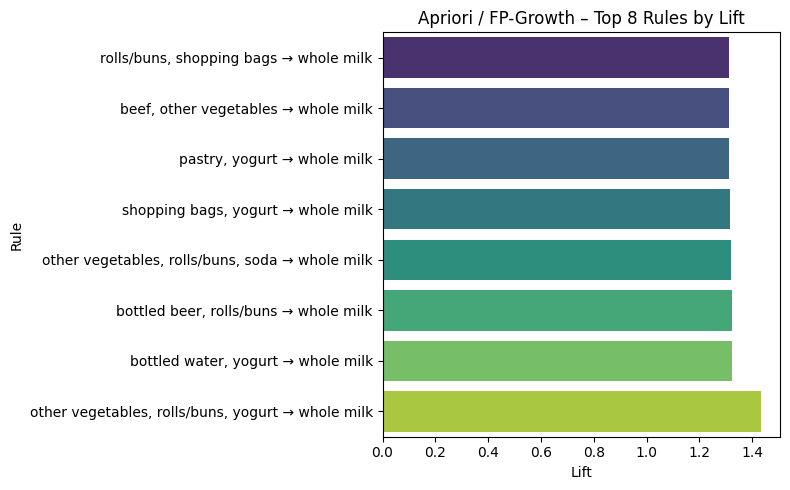

In [32]:
def rule_to_str(antecedents, consequents, max_len=70):
    a = ", ".join(sorted(list(antecedents)))
    c = ", ".join(sorted(list(consequents)))
    s = f"{a} → {c}"
    return (s[:max_len] + "…") if len(s) > max_len else s


def plot_top_rules_by_metric(rules, metric='lift', top_n=8, title_prefix=""):
    r = rules.copy()
    r['rule_str'] = r.apply(
        lambda row: rule_to_str(row['antecedents'], row['consequents']),
        axis=1
    )
    r_top = r.nlargest(top_n, metric).sort_values(metric)
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        data=r_top,
        x=metric,
        y='rule_str',
        hue='rule_str',
        dodge=False,
        palette='viridis'
        # ← remove legend=False here
    )
    
    plt.xlabel(metric.capitalize())
    plt.ylabel("Rule")
    plt.title(f"{title_prefix}Top {top_n} Rules by {metric.capitalize()}")
    
    ax.legend_.remove()        
    
    plt.tight_layout()
    plt.show()


plot_top_rules_by_metric(rules_filtered, metric='lift', top_n=8,
                         title_prefix="Apriori / FP-Growth – ")

---

## Comparing Apriori to FP-Growth

In [33]:

table = f"""
|           Metric           |                        Apriori                           |                                   FP-Growth                             |
|----------------------------|----------------------------------------------------------|-------------------------------------------------------------------------|
| Memory usage               | {ap_memory:.2f} MiB                                      | {fp_memory:.2f} MiB                                                     |
| Runtime                    | {ap_time:.4f} sec                                        | {fp_time:.4f} sec                                                       |
| # Frequent itemsets        | {ap_freq_itemsets}                                       | {fp_freq_itemsets}                                                      |
| # Rules                    | {ap_rules}                                               | {fp_rules}                                                              |
| Scalability                | scales poorly when dataset is very large, or minsup is very low; requires many scans. | Scales better on large, dense datasets with low minsup. |
"""

display(Markdown(table))


|           Metric           |                        Apriori                           |                                   FP-Growth                             |
|----------------------------|----------------------------------------------------------|-------------------------------------------------------------------------|
| Memory usage               | 42.27 MiB                                      | 16.78 MiB                                                     |
| Runtime                    | 0.1517 sec                                        | 44.6174 sec                                                       |
| # Frequent itemsets        | 415                                       | 415                                                      |
| # Rules                    | 8                                               | 8                                                              |
| Scalability                | scales poorly when dataset is very large, or minsup is very low; requires many scans. | Scales better on large, dense datasets with low minsup. |


**Explanation:**             
FP-Growth is usually better for large datasets with many frequent patterns,           
but for a small dataset like this, the overhead of FP-Growth is higher, so Apriori performs better in run time.      